<a href="https://colab.research.google.com/github/chelimallatejasai/Lion-Optimizer-/blob/main/TEJANNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
dataset = pd.read_csv('/content/cancer patient data sets.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

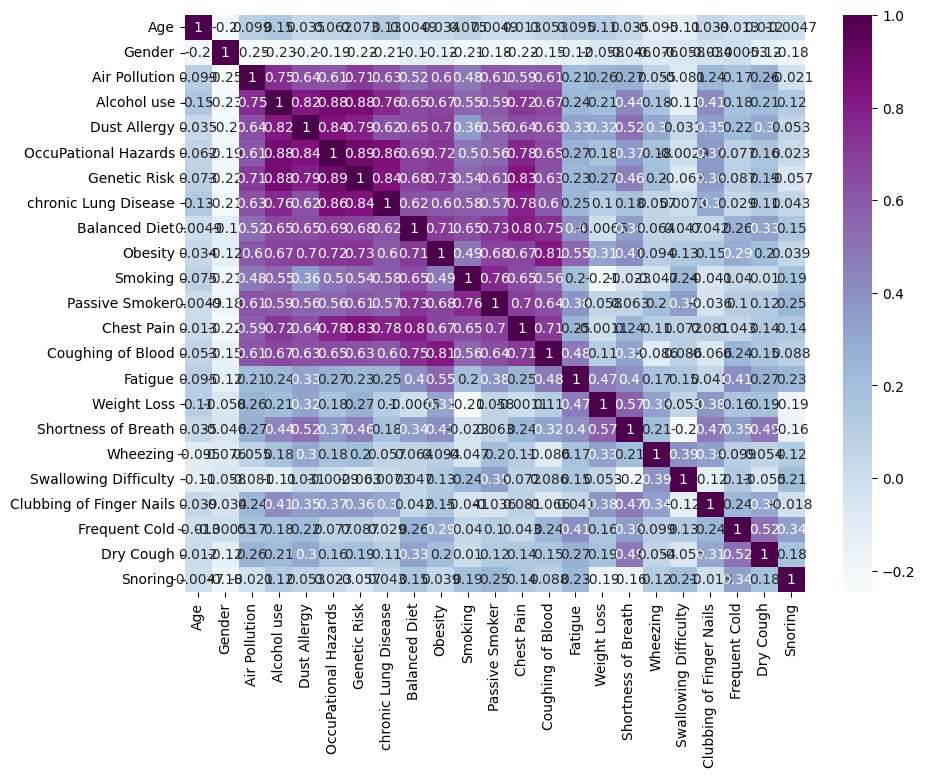

In [ ]:
dataset.head()
dataset.tail()
dataset.info()
dataset.describe().T
import seaborn as sns
import matplotlib.pyplot as plt
corr_var=dataset.corr(numeric_only=True) # added numeric_only=True
print(corr_var)
plt.figure(figsize=(10,7.5)) #matplotlib.pyplot is now imported as plt
sns.heatmap(corr_var, annot=True, cmap='BuPu') #seaborn is now imported as sns
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 📂 Load dataset
dataset = pd.read_csv('/content/cancer patient data sets.csv')
# 📋 Print basic info
print("Columns in dataset:", dataset.columns.tolist())
print("\nDataset Info:")
print(dataset.info())

# 🧹 Handle missing numeric values
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# 🎯 Define target and features
target_col = 'Level'
columns_to_drop = [target_col]

if 'Patient Id' in dataset.columns:
    columns_to_drop.append('Patient Id')

X = dataset.drop(columns=columns_to_drop, axis=1)
y = dataset[target_col]

# 🔤 Encode target
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# 🔠 Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
binary_cols = [col for col in categorical_cols if X[col].nunique() == 2]
multi_cat_cols = [col for col in categorical_cols if X[col].nunique() > 2]

# Label encode binary columns
for col in binary_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# One-hot encode multi-category columns
X = pd.get_dummies(X, columns=multi_cat_cols, drop_first=True)

# ⚖️ Scale numeric features
numeric_features = [col for col in X.columns if col in numeric_cols]
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# ✅ Training model on ALL data
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

print("\n✅ Model trained on the entire dataset.")
print(f"Dataset shape used for training: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")


Columns in dataset: ['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
dataset = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# Set target column
target_col = 'Anxiety Level (1-10)'
columns_to_drop = [target_col]

# Features and Target
X = dataset.drop(columns=columns_to_drop, axis=1)
y = dataset[target_col]

# Recalculate numeric columns (after dropping target)
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Fill missing numeric values
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Convert target to int if it's float (optional)
y = y.astype(int)

# Encode target
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
binary_cols = [col for col in categorical_cols if X[col].nunique() == 2]
multi_cat_cols = [col for col in categorical_cols if X[col].nunique() > 2]

# Label encode binary categorical columns
for col in binary_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# One-hot encode multi-class categorical columns
X = pd.get_dummies(X, columns=multi_cat_cols, drop_first=True)

# Feature scaling
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train on full dataset
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

print("\n✅ Model trained on entire dataset.")
print(f"🧪 Total samples used: {X.shape[0]}")
print(f"📈 Total features used: {X.shape[1]}")
print(f"🎯 Target classes: {le_y.classes_}")



✅ Model trained on entire dataset.
🧪 Total samples used: 11000
📈 Total features used: 30
🎯 Target classes: [ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# 💡 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# 🧹 Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Ensure target column exists
target_col = 'Anxiety Level (1-10)'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found.")

# 🧽 Step 4: Filter valid numeric values in target column
def is_valid_anxiety(val):
    try:
        val = int(val)
        return 1 <= val <= 10
    except:
        return False

df = df[df[target_col].apply(is_valid_anxiety)]
df[target_col] = df[target_col].astype(int) - 1  # Convert 1–10 → 0–9

# 🎯 Step 5: Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]
y_cat = to_categorical(y, num_classes=10)

# 🔤 Step 6: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 🔢 Step 7: Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# 🧠 Step 9: Build ANN model for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0–9)
])

# ⚙️ Step 10: Compile model
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 🏋️ Step 11: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test), verbose=1)

# 📊 Step 12: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# 🔍 Step 13: Classification report
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\n📝 Classification Report:\n", classification_report(y_true, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2332 - loss: 1.9887 - val_accuracy: 0.3559 - val_loss: 1.4518
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3618 - loss: 1.4246 - val_accuracy: 0.3423 - val_loss: 1.4130
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3742 - loss: 1.3846 - val_accuracy: 0.3595 - val_loss: 1.4113
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3805 - loss: 1.3757 - val_accuracy: 0.3500 - val_loss: 1.4038
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3815 - loss: 1.3665 - val_accuracy: 0.3577 - val_loss: 1.4081
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3875 - loss: 1.3552 - val_accuracy: 0.3632 - val_loss: 1.4010
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3987 - loss: 1.3521 - val_accuracy: 0.3500 - val_loss: 1.4108
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3987 - loss: 1.3477 - val_accuracy: 0.

In [ ]:
# 💡 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Nadam

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# 🧹 Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Ensure target column exists
target_col = 'Anxiety Level (1-10)'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found.")

# 🧽 Step 4: Filter valid numeric values in target column
def is_valid_anxiety(val):
    try:
        val = int(val)
        return 1 <= val <= 10
    except:
        return False

df = df[df[target_col].apply(is_valid_anxiety)]
df[target_col] = df[target_col].astype(int) - 1  # Convert 1–10 → 0–9

# 🎯 Step 5: Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]
y_cat = to_categorical(y, num_classes=10)

# 🔤 Step 6: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 🔢 Step 7: Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# 🧠 Step 9: Build ANN model for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0–9)
])

# ⚙️ Step 10: Compile model
Nadam_optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=Nadam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 🏋️ Step 11: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test), verbose=1)

# 📊 Step 12: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# 🔍 Step 13: Classification report
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\n📝 Classification Report:\n", classification_report(y_true, y_pred))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


440/440 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2350 - loss: 1.9116 - val_accuracy: 0.3514 - val_loss: 1.4282
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3740 - loss: 1.4054 - val_accuracy: 0.3373 - val_loss: 1.4184
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3835 - loss: 1.3842 - val_accuracy: 0.3564 - val_loss: 1.4116
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3858 - loss: 1.3707 - val_accuracy: 0.3459 - val_loss: 1.4040
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3863 - loss: 1.3646 - val_accuracy: 0.3682 - val_loss: 1.4115
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3960 - loss: 1.3533 - val_accuracy: 0.3491 - val_loss: 1.4027
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4072 - loss: 1.3565 - val_accuracy: 0.3655 - val_loss: 1.4136
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3994 - loss: 1.3518 - val_accuracy: 0.3505 - val_

In [ ]:
# 💡 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import AdamW

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# 🧹 Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Ensure target column exists
target_col = 'Anxiety Level (1-10)'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found.")

# 🧽 Step 4: Filter valid numeric values in target column
def is_valid_anxiety(val):
    try:
        val = int(val)
        return 1 <= val <= 10
    except:
        return False

df = df[df[target_col].apply(is_valid_anxiety)]
df[target_col] = df[target_col].astype(int) - 1  # Convert 1–10 → 0–9

# 🎯 Step 5: Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]
y_cat = to_categorical(y, num_classes=10)

# 🔤 Step 6: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 🔢 Step 7: Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# 🧠 Step 9: Build ANN model for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0–9)
])

# ⚙️ Step 10: Compile model
adamW_optimizer = AdamW(learning_rate=0.001)
model.compile(optimizer=adamW_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 🏋️ Step 11: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test), verbose=1)

# 📊 Step 12: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# 🔍 Step 13: Classification report
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\n📝 Classification Report:\n", classification_report(y_true, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1946 - loss: 2.0143 - val_accuracy: 0.3645 - val_loss: 1.4374
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3635 - loss: 1.4142 - val_accuracy: 0.3677 - val_loss: 1.4020
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3751 - loss: 1.3907 - val_accuracy: 0.3709 - val_loss: 1.3994
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3780 - loss: 1.3798 - val_accuracy: 0.3809 - val_loss: 1.3880
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3940 - loss: 1.3656 - val_accuracy: 0.3691 - val_loss: 1.3970
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3841 - loss: 1.3624 - val_accuracy: 0.3509 - val_loss: 1.4169
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4026 - loss: 1.3437 - val_accuracy: 0.3655 - val_loss: 1.4043
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4077 - loss: 1.3448 - val_accuracy: 0.

In [ ]:
# 💡 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Ftrl

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# 🧹 Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Ensure target column exists
target_col = 'Anxiety Level (1-10)'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found.")

# 🧽 Step 4: Filter valid numeric values in target column
def is_valid_anxiety(val):
    try:
        val = int(val)
        return 1 <= val <= 10
    except:
        return False

df = df[df[target_col].apply(is_valid_anxiety)]
df[target_col] = df[target_col].astype(int) - 1  # Convert 1–10 → 0–9

# 🎯 Step 5: Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]
y_cat = to_categorical(y, num_classes=10)

# 🔤 Step 6: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 🔢 Step 7: Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# 🧠 Step 9: Build ANN model with Batch Normalization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')  # 10 classes
])

# ⚙️ Step 10: Compile model
Ftrl_optimizer = Ftrl(learning_rate=0.001)
model.compile(optimizer=Ftrl_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 🏋️ Step 11: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test), verbose=1)

# 📊 Step 12: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# 🔍 Step 13: Classification report
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\n📝 Classification Report:\n", classification_report(y_true, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2130 - loss: 2.3017 - val_accuracy: 0.2109 - val_loss: 2.2832
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2169 - loss: 2.2807 - val_accuracy: 0.2109 - val_loss: 2.2743
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2173 - loss: 2.2724 - val_accuracy: 0.2109 - val_loss: 2.2673
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2171 - loss: 2.2654 - val_accuracy: 0.2191 - val_loss: 2.2613
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2176 - loss: 2.2593 - val_accuracy: 0.2191 - val_loss: 2.2558
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2236 - loss: 2.2538 - val_accuracy: 0.2191 - val_loss: 2.2503
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2143 - loss: 2.2492 - val_accuracy: 0.2191 - val_loss: 2.2448
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2122 - loss: 2.2427 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 💡 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Ftrl

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# 🧹 Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Ensure target column exists
target_col = 'Anxiety Level (1-10)'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found.")

# 🧽 Step 4: Filter valid numeric values in target column
def is_valid_anxiety(val):
    try:
        val = int(val)
        return 1 <= val <= 10
    except:
        return False

df = df[df[target_col].apply(is_valid_anxiety)]
df[target_col] = df[target_col].astype(int) - 1  # Convert 1–10 → 0–9

# 🎯 Step 5: Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]
y_cat = to_categorical(y, num_classes=10)

# 🔤 Step 6: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 🔢 Step 7: Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# 🧠 Step 9: Build ANN model with Batch Normalization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')  # 10 classes
])

# ⚙️ Step 10: Compile model
Ftrl_optimizer = Ftrl(learning_rate=0.001)
model.compile(optimizer=Ftrl_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 🏋️ Step 11: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test), verbose=1)

# 📊 Step 12: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# 🔍 Step 13: Classification report
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\n📝 Classification Report:\n", classification_report(y_true, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2132 - loss: 2.2992 - val_accuracy: 0.2109 - val_loss: 2.2836
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2223 - loss: 2.2807 - val_accuracy: 0.2109 - val_loss: 2.2747
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2218 - loss: 2.2730 - val_accuracy: 0.2109 - val_loss: 2.2678
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2234 - loss: 2.2654 - val_accuracy: 0.2109 - val_loss: 2.2619
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2150 - loss: 2.2603 - val_accuracy: 0.2109 - val_loss: 2.2564
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2272 - loss: 2.2541 - val_accuracy: 0.2109 - val_loss: 2.2509
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2200 - loss: 2.2490 - val_accuracy: 0.2109 - val_loss: 2.2453
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2125 - loss: 2.2437 - val_accuracy: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50
469/469 - 9s - 19ms/step - accuracy: 0.9229 - loss: 0.1961 - val_accuracy: 0.9740 - val_loss: 0.0908
Epoch 2/50
469/469 - 3s - 6ms/step - accuracy: 0.9566 - loss: 0.1220 - val_accuracy: 0.9762 - val_loss: 0.0824
Epoch 3/50
469/469 - 4s - 8ms/step - accuracy: 0.9652 - loss: 0.1064 - val_accuracy: 0.9810 - val_loss: 0.0818
Epoch 4/50
469/469 - 5s - 10ms/step - accuracy: 0.9677 - loss: 0.1069 - val_accuracy: 0.9830 - val_loss: 0.0744
Epoch 5/50
469/469 - 5s - 10ms/step - accuracy: 0.9708 - loss: 0.0920 - val_accuracy: 0.9842 - val_loss: 0.0707
Epoch 6/50
469/469 - 2s - 4ms/step - accuracy: 0.9730 - loss: 0.0911 - val_accuracy: 0.9842 - val_loss: 0.0685
Epoch 7/50
469/469 - 3s - 5ms/step - accuracy: 0.9742 - loss: 0.0866 - val_accuracy: 0.9850 - val_loss: 0.0725
Epoch 8/50
469/469 - 3s - 6ms/step - accuracy: 0.9759 - loss: 0.0800 - val_accuracy: 0.9868 - val_loss: 0.0686
Epoch 9/50
469/469 - 2s - 4ms/step - accuracy: 0.9770 - loss: 0.0811 - val_accuracy: 0.9868 - val_loss: 0.064

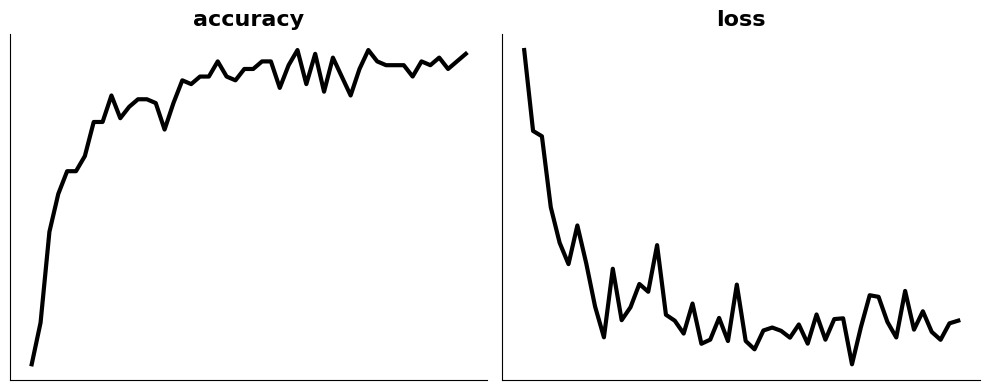

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# --------------------------
# 🔧 Step 0: Custom Lion Optimizer
# --------------------------
class LionOptimizer(tf.keras.optimizers.Optimizer):
    def __init__(
        self,
        learning_rate=0.001,
        beta1=0.9,
        beta2=0.99,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        name="lion",
        **kwargs
    ):
        super().__init__(
            learning_rate=learning_rate,
            weight_decay=weight_decay,
            clipnorm=clipnorm,
            clipvalue=clipvalue,
            global_clipnorm=global_clipnorm,
            use_ema=use_ema,
            ema_momentum=ema_momentum,
            ema_overwrite_frequency=ema_overwrite_frequency,
            name=name,
            **kwargs
        )
        self.beta1 = beta1
        self.beta2 = beta2
        # Dictionary to track variables and their momentums
        self._momentum_dict = {}

    def build(self, var_list):
        """Initialize optimizer variables."""
        super().build(var_list)
        if hasattr(self, "_built") and self._built:
            return

        # Create momentum variables for each trainable variable
        for i, var in enumerate(var_list):
            var_key = self._var_key(var)
            # Use a simple indexed name that avoids any problematic characters
            momentum_name = f"m_{i}"
            momentum = self.add_variable_from_reference(
                reference_variable=var, name=momentum_name
            )
            self._momentum_dict[var_key] = momentum

        self._built = True

    def update_step(self, gradient, variable, learning_rate):
        """Update step given gradient and the associated model variable."""
        var_dtype = variable.dtype
        lr = tf.cast(learning_rate, var_dtype)
        beta1 = tf.cast(self.beta1, var_dtype)

        var_key = self._var_key(variable)
        momentum = self._momentum_dict[var_key]

        # Update momentum
        momentum_t = beta1 * momentum + (1 - beta1) * gradient

        # Update variable using the sign of momentum
        variable.assign_sub(lr * tf.sign(momentum_t))

        # Store the updated momentum
        momentum.assign(momentum_t)

    def get_config(self):
        config = super().get_config()
        config.update({
            "beta1": self.beta1,
            "beta2": self.beta2,
        })
        return config

# --------------------------
# Step 1: Dataset
# --------------------------
X, y = make_classification(n_samples=20000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --------------------------
# Step 2: Model
# --------------------------
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# --------------------------
# Step 3: Compile with Custom Optimizer
# --------------------------
optimizer = LionOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.99)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# --------------------------
# Step 4: Train
# --------------------------
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# --------------------------
# Step 5: Evaluate
# --------------------------
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Accuracy: {accuracy:.4f}, Final Loss: {loss:.4f}")

# --------------------------
# Step 6: Plot clean style like reference
# --------------------------
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], color='black', linewidth=3)
plt.title('accuracy', fontsize=16, weight='bold')
plt.xticks([]); plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], color='black', linewidth=3)
plt.title('loss', fontsize=16, weight='bold')
plt.xticks([]); plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()